<a href="https://colab.research.google.com/github/prashanth741/ADM-LAB/blob/main/lab%20-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2] # Taking first two features (Sepal length and width)
y = (iris.target != 0) * 1 # Converting to binary classification (0 or 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit and transform training data
X_test = scaler.transform(X_test) # Transform test data

In [7]:
model = LogisticRegression() # Initialize model
model.fit(X_train, y_train) # Train the model with training data

LogisticRegression()

In [8]:
y_pred = model.predict(X_test) # Predict on test data

In [9]:
accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred) # Generate confusion matrix
report = classification_report(y_test, y_pred) # Detailed performance report

In [10]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 1.00
Confusion Matrix:
 [[10  0]
 [ 0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Decision Boundary of Logistic Regression')

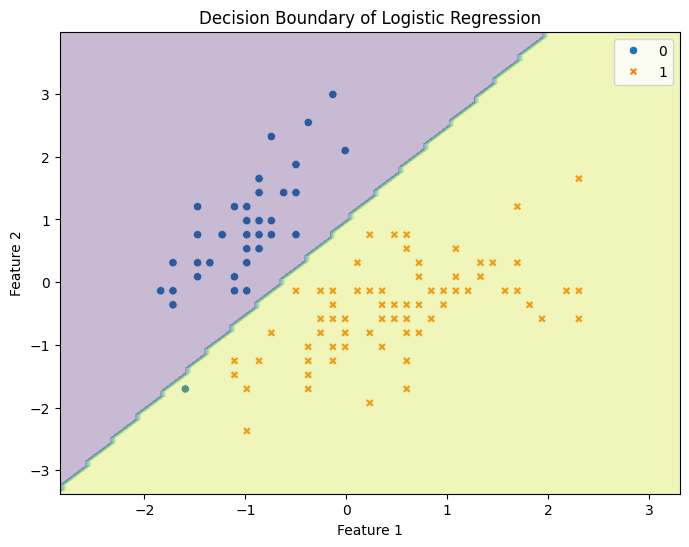

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, style=y_train) # Plot training data points
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)) # Create grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) # Predict for grid points
plt.contourf(xx, yy, Z, alpha=0.3) # Draw decision boundary
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')

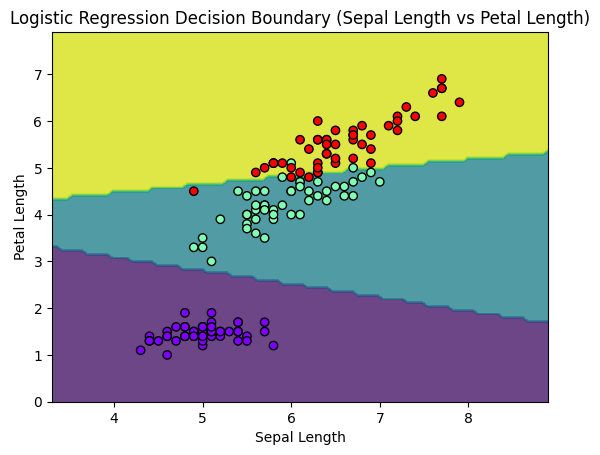

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

model = LogisticRegression(max_iter=200)

model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Logistic Regression Decision Boundary (Sepal Length vs Petal Length)')
plt.show()


In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2f}')


Accuracy on the test set: 0.98


In [19]:
model_l1 = LogisticRegression(solver='liblinear', penalty='l1', max_iter=200)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
print(f'Accuracy with L1 regularization: {accuracy_l1:.2f}')
model_l2 = LogisticRegression(solver='liblinear', penalty='l2', max_iter=200)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
print(f'Accuracy with L2 regularization: {accuracy_l2:.2f}')


Accuracy with L1 regularization: 0.98
Accuracy with L2 regularization: 0.98
